# Basic imports

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix

# Loading image sample

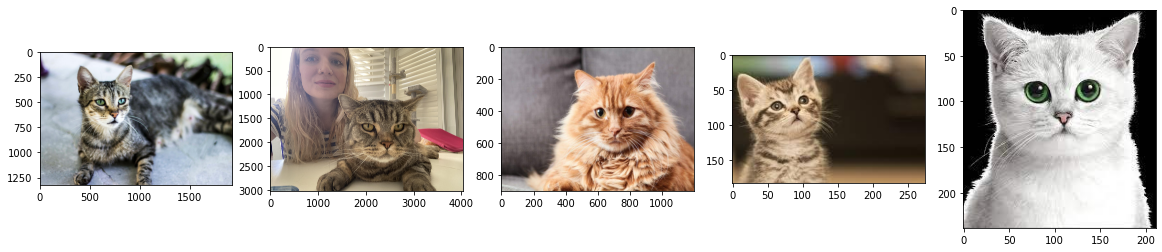

In [2]:
f, ax = plt.subplots(1,5,figsize=(20,8))
for i, img_filename in enumerate(os.listdir("./cats_and_dogs/train/cats/")[:5]):
    ax[i].imshow(np.array(Image.open(f"./cats_and_dogs/train/cats/{img_filename}")))

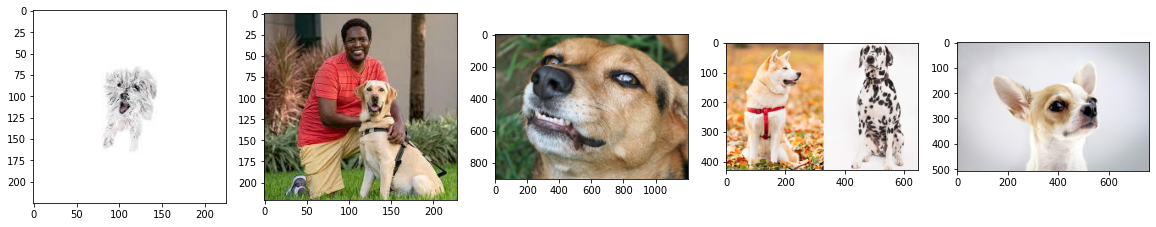

In [3]:
f, ax = plt.subplots(1,5,figsize=(20,8))
for i, img_filename in enumerate(os.listdir("./cats_and_dogs/train/dogs/")[:5]):
    ax[i].imshow(Image.open(f"./cats_and_dogs/train/dogs/{img_filename}"))

# Splitting dataset in train/test

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-05-06 16:11:26.358345: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-06 16:11:26.358358: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    './cats_and_dogs/train/',
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary',
    shuffle=True
)

Found 557 images belonging to 2 classes.


In [6]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_generator = test_datagen.flow_from_directory(
    './cats_and_dogs/test/',
    target_size=(150, 150),
    batch_size=16,
    class_mode='binary',
    shuffle=True
)

Found 140 images belonging to 2 classes.


# Creating and training CNN

## First basic CNN

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [8]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 1)                 175233    
                                                                 
Total params: 176,129
Trainable params: 176,129
Non-trainable params: 0
_________________________________________________________________


2023-05-06 16:11:27.261938: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:969] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-06 16:11:27.262100: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-06 16:11:27.262131: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-05-06 16:11:27.262158: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-05-06 16:11:27.262184: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [9]:
model.fit(
    train_generator,
    epochs=30
)

Epoch 1/30
35/35 [==============================] - 4s 116ms/step - loss: 2.3485 - accuracy: 0.5206
Epoch 2/30
35/35 [==============================] - 4s 114ms/step - loss: 0.6985 - accuracy: 0.5673
Epoch 3/30
35/35 [==============================] - 4s 114ms/step - loss: 0.6393 - accuracy: 0.6266
Epoch 4/30
35/35 [==============================] - 4s 112ms/step - loss: 0.6135 - accuracy: 0.6750
Epoch 5/30
35/35 [==============================] - 4s 109ms/step - loss: 0.6041 - accuracy: 0.7056
Epoch 6/30
35/35 [==============================] - 4s 114ms/step - loss: 0.5916 - accuracy: 0.7056
Epoch 7/30
35/35 [==============================] - 4s 114ms/step - loss: 0.6245 - accuracy: 0.7020
Epoch 8/30
35/35 [==============================] - 4s 114ms/step - loss: 0.5449 - accuracy: 0.7487
Epoch 9/30
35/35 [==============================] - 4s 114ms/step - loss: 0.5377 - accuracy: 0.7433
Epoch 10/30
35/35 [==============================] - 4s 114ms/step - loss: 0.5016 - accuracy: 0.7738

In [10]:
y_pred = np.asarray([0 if pred[0] < 0.5 else 1 for pred in model.predict(test_generator)])
y_pred.shape

9/9 [==============================] - 1s 89ms/step


(140,)

In [11]:
print(classification_report(test_generator.labels, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.4776    0.4571    0.4672        70
           1     0.4795    0.5000    0.4895        70

    accuracy                         0.4786       140
   macro avg     0.4785    0.4786    0.4783       140
weighted avg     0.4785    0.4786    0.4783       140



<AxesSubplot:>

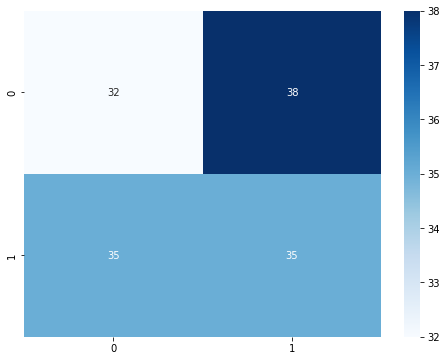

In [12]:
f, ax = plt.subplots(1,1,figsize=(8,6))
sns.heatmap(confusion_matrix(test_generator.labels, y_pred), cmap="Blues", annot=True, fmt="g", ax=ax)

## Second CNN

In [13]:
classifier = Sequential()
classifier.add(Conv2D(32, (4,4), input_shape=(150,150,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=2))
classifier.add(Conv2D(32, (3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2), strides=2))
classifier.add(Flatten())
# classifier.add(Dropout(0.5))
classifier.add(Dense(units=1, activation='sigmoid'))
classifier.compile(optimizer="rmsprop", loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      1568      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 39200)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [14]:
classifier.fit(
    train_generator,
    epochs=60,
)

Epoch 1/60
35/35 [==============================] - 5s 129ms/step - loss: 0.7900 - accuracy: 0.5242
Epoch 2/60
35/35 [==============================] - 5s 128ms/step - loss: 0.7121 - accuracy: 0.5476
Epoch 3/60
35/35 [==============================] - 5s 129ms/step - loss: 0.6961 - accuracy: 0.5601
Epoch 4/60
35/35 [==============================] - 5s 130ms/step - loss: 0.7074 - accuracy: 0.5835
Epoch 5/60
35/35 [==============================] - 5s 130ms/step - loss: 0.6692 - accuracy: 0.6338
Epoch 6/60
35/35 [==============================] - 5s 128ms/step - loss: 0.6137 - accuracy: 0.6715
Epoch 7/60
35/35 [==============================] - 5s 129ms/step - loss: 0.6132 - accuracy: 0.6876
Epoch 8/60
35/35 [==============================] - 5s 130ms/step - loss: 0.5944 - accuracy: 0.6894
Epoch 9/60
35/35 [==============================] - 5s 129ms/step - loss: 0.5632 - accuracy: 0.7145
Epoch 10/60
35/35 [==============================] - 5s 128ms/step - loss: 0.5565 - accuracy: 0.7199

In [15]:
y_pred_c = np.asarray([1 if pred[0] > 0.5 else 0 for pred in classifier.predict(test_generator)])
y_pred_c.shape

9/9 [==============================] - 1s 85ms/step


(140,)

In [16]:
print(classification_report(test_generator.labels, y_pred_c, digits=4))

              precision    recall  f1-score   support

           0     0.5278    0.5429    0.5352        70
           1     0.5294    0.5143    0.5217        70

    accuracy                         0.5286       140
   macro avg     0.5286    0.5286    0.5285       140
weighted avg     0.5286    0.5286    0.5285       140



<AxesSubplot:>

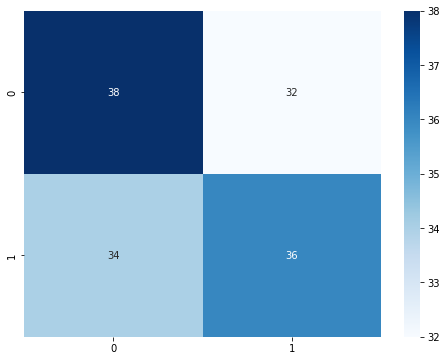

In [17]:
f, ax = plt.subplots(1,1,figsize=(8,6))
sns.heatmap(confusion_matrix(test_generator.labels, y_pred_c), cmap="Blues", annot=True, fmt="g", ax=ax)